#  Logistic Regression to find out the diabetes

In [1]:
from  sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
(df == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

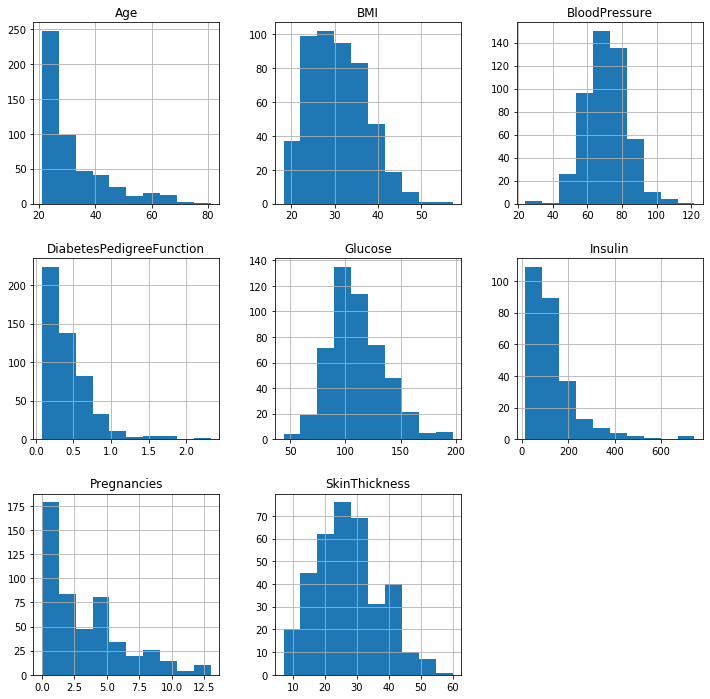

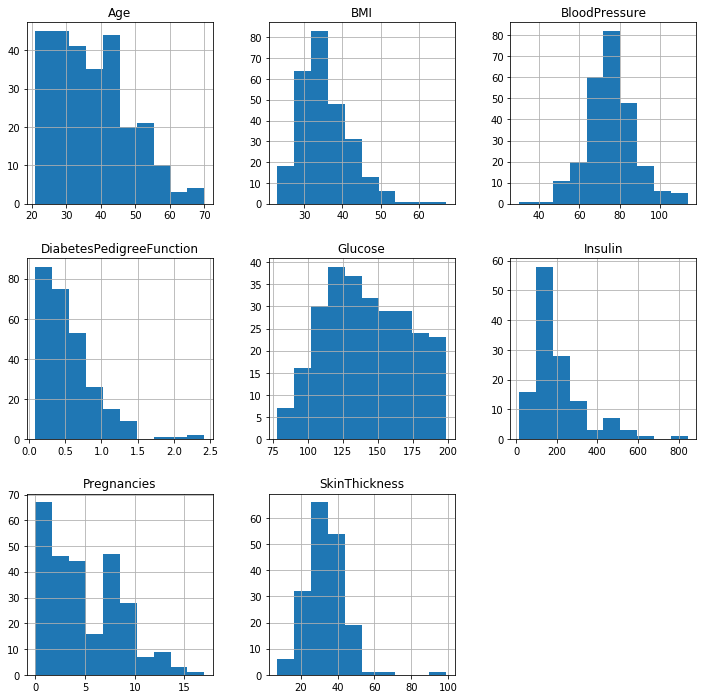

In [50]:
df.groupby('Outcome').hist(figsize=(12, 12))

In [7]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


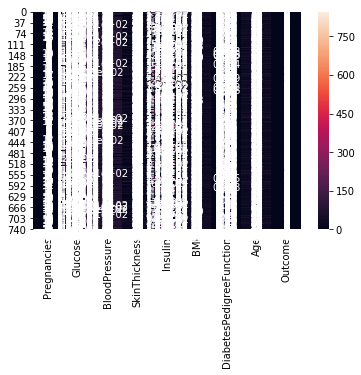

In [8]:
sns.heatmap(df, annot = True)

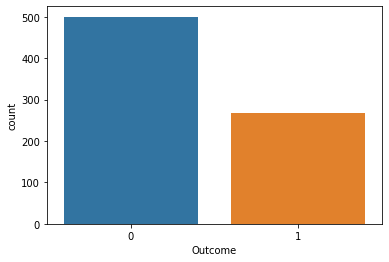

In [9]:
sns.countplot(x='Outcome',data=df)

In [10]:
features = list(df.columns)[:-1]
df[features[1:]] = df[features[1:]].replace(0, np.NaN)
X = df[features] 
y = df['Outcome']
transform_X = X.copy()
imputer = SimpleImputer(missing_values=np.NaN, strategy = 'mean')
transform_X [features[1:]] = imputer.fit_transform(transform_X[features[1:]].values)
#Glucose can not be 0. BP can not be zero. Insulin can not be zero, BMI can not be zero
#df.shape

In [11]:
transform_X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [12]:
lr_model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)

In [13]:
lr_model.fit(X_train, y_train)
predict = lr_model.predict(X_test)
print('The result for prediction is: ',predict)

The result for prediction is:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
score = lr_model.score(X_test, y_test, predict)

In [15]:
print('The accuracy is ', score * 100)

The accuracy is  67.56756756756756


In [32]:
kfold = KFold(n_splits=10)
result = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

In [33]:
print('The result of 10 fold cross validation is: ',result)
print('The mean result of 10 fold cross validation is: ',result.mean())

The result of 10 fold cross validation is:  [0.75806452 0.67741935 0.80645161 0.79032258 0.75409836 0.73770492
 0.80327869 0.6557377  0.75409836 0.73770492]
The mean result of 10 fold cross validation is:  0.74748810153358


Train confusion matrix


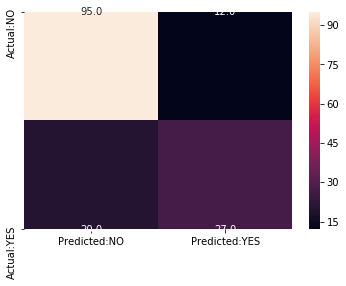

In [34]:
print("Train confusion matrix")
cf = confusion_matrix(y_test, predict)
con_df = pd.DataFrame(cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
sns.heatmap(con_df,annot=True, fmt=".1f")

In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



In [36]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

AttributeError: 'LogisticRegression' object has no attribute 'proba'

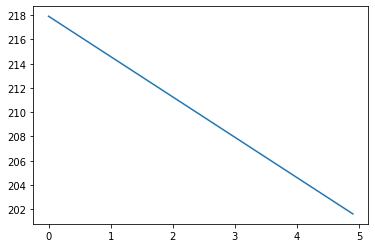

In [51]:
points_x=[x/10. for x in range(0,50)]
line_bias = lr_model.intercept_
line_w = lr_model.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)
plt.scatter(lr_model.proba(), X.iloc[:,1],c=y)
plt.show()

###### Feature Engineering

In [38]:
rfecv = RFECV(estimator=lr_model, step=1, cv=kfold, scoring='accuracy')
rfecv.fit(transform_X, y)

C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFECV(cv=KFold(n_splits=10, random_state=9, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=0, solver='warn',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

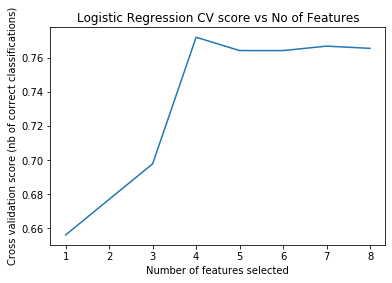

Important features are: [('Pregnancies', True), ('Glucose', True), ('BloodPressure', False), ('SkinThickness', False), ('Insulin', False), ('BMI', True), ('DiabetesPedigreeFunction', True), ('Age', False)]


In [39]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
feature_importance = list(zip(features, rfecv.support_))
print('Important features are:',feature_importance)

In [40]:
imp_features = []
for key,val in feature_importance:
    if val: imp_features.append(key)
print('Features selected are', imp_features)

Features selected are ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


In [41]:
X_fe_train = X_train[imp_features]
X_fe_test = X_test[imp_features]
lr_model.fit(X_fe_train, y_train)
predict = lr_model.predict(X_fe_test)

C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print('The result after prediction is: ',predict)

The result after prediction is:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [43]:
score = lr_model.score(X_fe_test, y_test, predict)
print('The accuracy after feature engineering is ', score * 100)

The accuracy after feature engineering is  69.23076923076923


In [44]:
result = cross_val_score(lr_model, X_fe_train, y_train, cv=kfold, scoring='accuracy')

C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\RakeshPolepeddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed

In [45]:
print('The results after feature engineering: ',result)
print('The result mean after feature engineering: ',result.mean())

The results after feature engineering:  [0.77419355 0.64516129 0.83870968 0.75806452 0.73770492 0.7704918
 0.7704918  0.72131148 0.7704918  0.80327869]
The result mean after feature engineering:  0.7589899524061343


Train confusion matrix


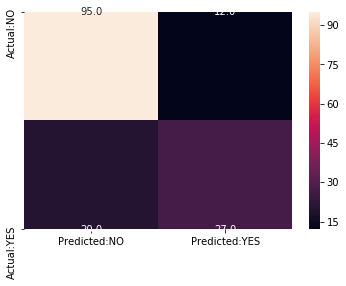

In [46]:
print("Train confusion matrix")
cf = confusion_matrix(y_test, predict)
con_df = pd.DataFrame(cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
sns.heatmap(con_df,annot=True, fmt=".1f")

In [47]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



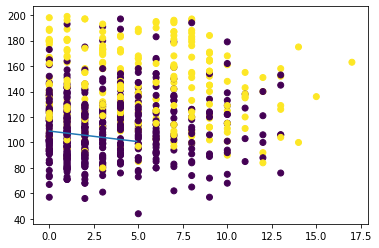

In [49]:
points_x=[x/10. for x in range(0,50)]
line_bias = lr_model.intercept_
line_w = lr_model.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-2*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y)
plt.show()